In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
df = datasets.load_boston()

In [3]:
X,y = shuffle(df.data,df.target,random_state=7)

In [4]:
num_training = int(0.8*len(X))
X_train,y_train = X[:num_training],y[:num_training]
X_test,y_test = X[num_training:],y[num_training:]

In [5]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [7]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred_dt)
evs = explained_variance_score(y_test,y_pred_dt)
print("\n#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [8]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred_ab)
evs = explained_variance_score(y_test,y_pred_ab)
print("\n#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


*The error is lower and the variance score is closer to 1 when we use AdaBoost as shown in the preceding
output.*

In [9]:
def plot_feature_importances(feature_importances,title,feature_names):
    feature_importances = 100.0*(feature_importances/max(feature_importances))
    index_sorted = np.flipud(np.argsort(feature_importances))
    #print(index_sorted.shape)
    pos = np.arange(index_sorted.shape[0]) + 0.5
    plt.figure()
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

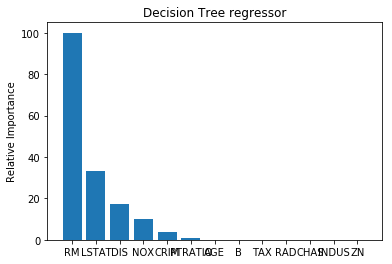

In [10]:
plot_feature_importances(dt_regressor.feature_importances_,'Decision Tree regressor',df.feature_names)

So, the decision tree regressor says that the most important feature is RM. Let's take a look at
what AdaBoost has to say in the following figure:

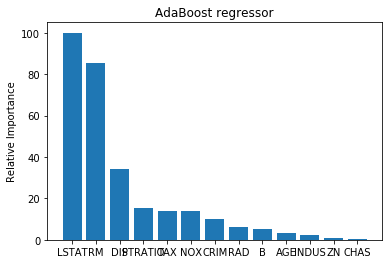

In [11]:
plot_feature_importances(ab_regressor.feature_importances_,'AdaBoost regressor',df.feature_names)

According to AdaBoost, the most important feature is LSTAT. In reality, if you build various regressors
on this data, you will see that the most important feature is in fact LSTAT. This shows the advantage of
using AdaBoost with a decision tree-based regressor.